# Recommendation Systems in Python

Full recommendation systems in python are complex. Utilize linear algebra background

The two most common types of recommender systems are Content-Based and Collaborative Filtering (CF).

1. Collaborative filtering produces recommendations based on the knowledge of users attitude to items, that is it uses the wisdom of the crowd to recommend items

2. Content-based recommender systems focus on the attributes of the items and give you recommendations based on the similarity between them.

Collaborative Filtering is more commonly used than content based systems.

CF can be divided into Memory-Based Collaborative Filtering and Model-Based collaborative filtering.

The the advanced notebook tutorial, we implement Model-Based CF by using singular value decomposition (SVD) and Memory-Based CF by computing cosine similarity

Lets build item similarity based recommendation systems with movie data.

More recommendation datasets in the notebook section of this udemy course

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sci
import seaborn as sns

%matplotlib inline

In [3]:
# create a variable with list of our column names

colums_name =['user_id', 'item_id', 'rating', 'timestamp']

In [4]:
# read in 'tab seperated file'
# its the Movie Lens Dataset

df = pd.read_csv('u.data',sep='\t', names=colums_name)

df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [6]:
# grab movie titles

movie_titles = pd.read_csv('Movie_Id_Titles')

movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [7]:
# merge the dataframe and movie titles
# On item_id

df = pd.merge(df,movie_titles, on='item_id')

df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [8]:
# set style to 'white'

sns.set_style('white')

In [10]:
# create ratings dataframe

# group by title column
# grab rating column
# average it
 
df.groupby('title')['rating'].mean()


# to see topt 5 movies with highest rating

###   df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

# do .count() to count them instead of .mean()

title
'Til There Was You (1997)                2.333333
1-900 (1994)                             2.600000
101 Dalmatians (1996)                    2.908257
12 Angry Men (1957)                      4.344000
187 (1997)                               3.024390
                                           ...   
Young Guns II (1990)                     2.772727
Young Poisoner's Handbook, The (1995)    3.341463
Zeus and Roxanne (1997)                  2.166667
unknown                                  3.444444
Á köldum klaka (Cold Fever) (1994)       3.000000
Name: rating, Length: 1664, dtype: float64

In [11]:
# pass the above into pandas dataframe

ratings = pd.DataFrame(df.groupby('title')['rating'].mean())

ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [12]:
# create a number of ratings column for count numbers

# ratings, add new column called number of ratings
ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())

ratings.head()

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


<Axes: >

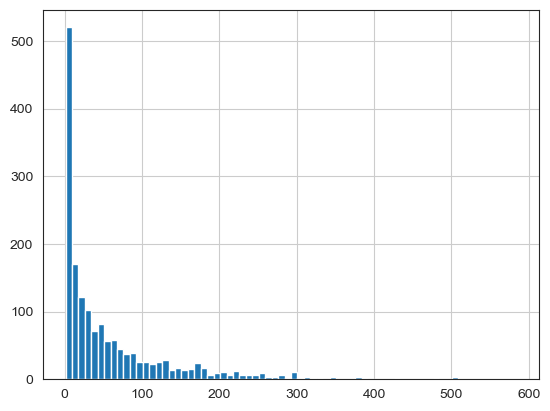

In [13]:
# plot out histogram bins for above

ratings['num of ratings'].hist(bins=70)

<Axes: >

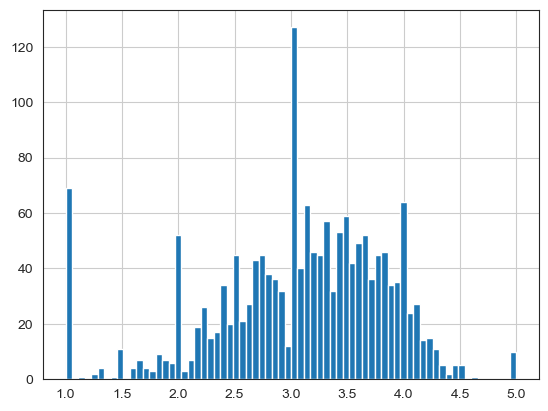

In [14]:
# see the actual ratings themselves

ratings['rating'].hist(bins=70)

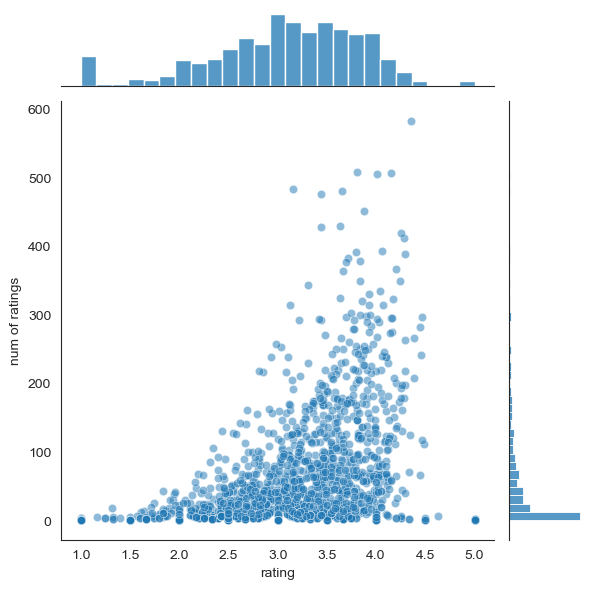

In [15]:
# relationship between ratings and number of ratings

# can use seaborn joint plot to visualize this

sns.jointplot(x='rating', y='num of ratings', data=ratings, alpha =0.5)

In [16]:
# create a matrix with movies titles on 1 axis and user id on 1 axis.
# each cell will be the rating the user game to the movie

# df.head()   our orignal dataframe
# use 'pivot table' to get this into matrix form

moviemat = df.pivot_table(index= 'user_id', columns='title', values='rating')

moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# most rated movies breakout

ratings.sort_values('num of ratings', ascending=False).head(10)

,rating,num of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [18]:
# lets grab user ratings for star wars and liar liar

starwars_user_ratings = moviemat['Star Wars (1977)']
liarliar_user_ratings = moviemat['Liar Liar (1997)']

In [19]:
# series with userid if gave rating or not 
starwars_user_ratings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [20]:
# corrwith METHOD to get correlation in two pandas series
# close to CORR method


moviemat.corrwith(starwars_user_ratings)

# get a bunch of movies below and their coorelation with star wars user ratings

C:\Users\D8ISU4A\AppData\Local\anaconda3\lib\site-packages\numpy\lib\function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\D8ISU4A\AppData\Local\anaconda3\lib\site-packages\numpy\lib\function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [21]:
# lets create object of above 

similar_to_starwars = moviemat.corrwith(starwars_user_ratings)

C:\Users\D8ISU4A\AppData\Local\anaconda3\lib\site-packages\numpy\lib\function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\D8ISU4A\AppData\Local\anaconda3\lib\site-packages\numpy\lib\function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


In [23]:
# do the same with liar liar

similar_to_liarliar = moviemat.corrwith(liarliar_user_ratings)

C:\Users\D8ISU4A\AppData\Local\anaconda3\lib\site-packages\numpy\lib\function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\D8ISU4A\AppData\Local\anaconda3\lib\site-packages\numpy\lib\function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


In [24]:
corr_starwars = pd.DataFrame(similar_to_starwars, columns=['Correlation'])

corr_starwars.dropna(inplace=True)

In [25]:
# created a dataframe where index is title of movie and coorleation.. 
# and tells use how coorelated this movie user ratings were to user ratings of star wars movie

corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [26]:
# thought there is an issue of some weird movies being perfectly coorelated with star wars

# probably because one other person who rated star wars 5 stars also rated these movies 5 stars

corr_starwars.sort_values('Correlation', ascending=False).head(10)

,Correlation
title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0
Hollow Reed (1996),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Good Man in Africa, A (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


In [30]:
# we can fix the above by setting a minimum movie viewed setting
# the histogram further above shows the drop off around 100 for many reviews

# join the dataframe together
corr_starwars = corr_starwars.join(ratings['num of ratings'])

# we used JOIN here instead of MERGE becuse title is the index of our dataframe

ValueError: columns overlap but no suffix specified: Index(['num of ratings'], dtype='object')

In [31]:
corr_starwars.head()

,Correlation,num of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [32]:
# now we will filter out any movies that dont have 100 ratings

corr_starwars[corr_starwars['num of ratings']>100].sort_values('Correlation', ascending=False).head()

,Correlation,num of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


In [34]:
# now lets explore liar liar

corr_liarliar = pd.DataFrame(similar_to_liarliar, columns=['Correlation'])

In [35]:
# first step for dataframe
# title  index  and correlation with movie
corr_liarliar

,Correlation
title,
'Til There Was You (1997),0.118913
1-900 (1994),NaN
101 Dalmatians (1996),0.469765
12 Angry Men (1957),0.066272
187 (1997),0.175145
...,...
Young Guns II (1990),0.352174
"Young Poisoner's Handbook, The (1995)",0.445016
Zeus and Roxanne (1997),-0.500000


In [36]:
# drop the nulls

corr_liarliar.dropna(inplace=True)

In [37]:
# get number of ratings

corr_liarliar = corr_liarliar.join(ratings['num of ratings'])

In [39]:
corr_liarliar

# now we have title correlation and number of ratings

,Correlation,num of ratings
title,,
'Til There Was You (1997),0.118913,9
101 Dalmatians (1996),0.469765,109
12 Angry Men (1957),0.066272,125
187 (1997),0.175145,41
2 Days in the Valley (1996),0.040739,93
...,...,...
Young Guns (1988),0.410988,101
Young Guns II (1990),0.352174,44
"Young Poisoner's Handbook, The (1995)",0.445016,41


In [40]:
# filter out the ratings less than 100

corr_liarliar[corr_liarliar['num of ratings']>100].sort_values('Correlation', ascending = False).head()

,Correlation,num of ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137


#### Now we can look at the lecture notebook for advanced recommender system

# Natural Language Processing

Natural Language Processing (NLP)

Deals with text or unstrucutred text data

examples work for google news - group news articles by topic
work at law firm - look through thousands of documents to find relivant information

We will want to 

- Compile Documents
- Featurize Them
- Compare their features


Below we will create Vectorized word count

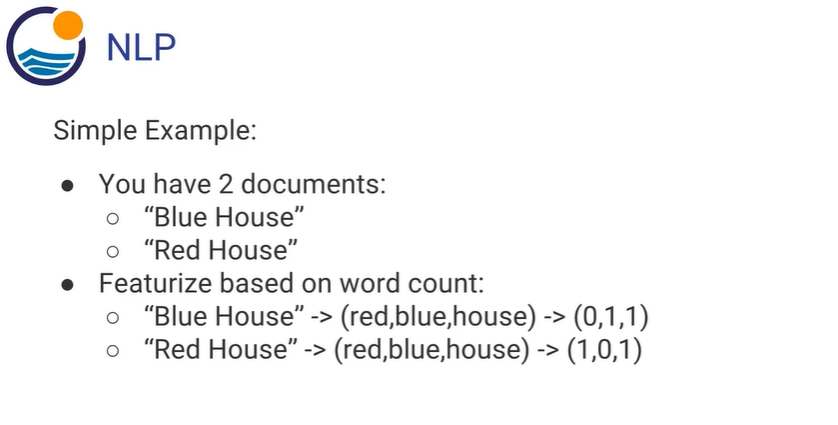

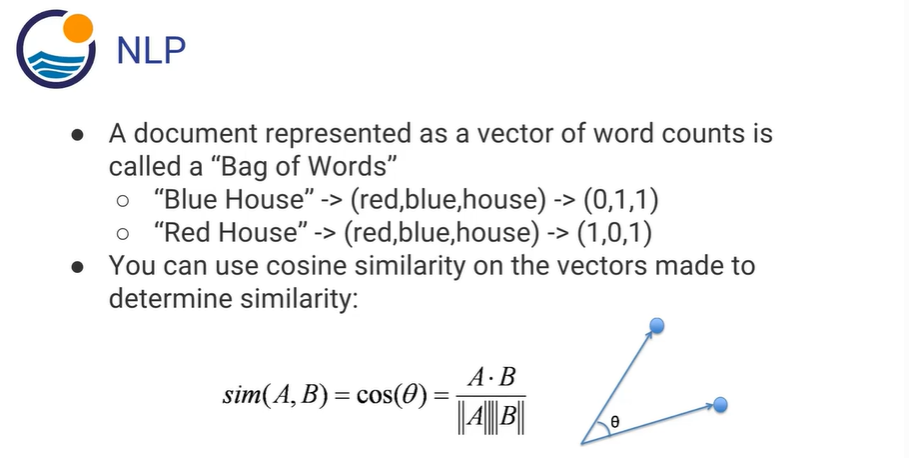

We can imporve on Bag of Words by adjusting word counts based on their frequency in corpus (the group of all the documents)

We can use TF-IDF (Term Frequency - Inverse Document Frequency)

Term Frequency - Importance of the term within that document
- TF(d,t) = Number of occurences of term t in document d

Inverse Document Frequency - Importance of the term in the corpus
- IDF(t) = log(D/t) where
  - D = Total number of documents
  - t = Total number of documents with the term

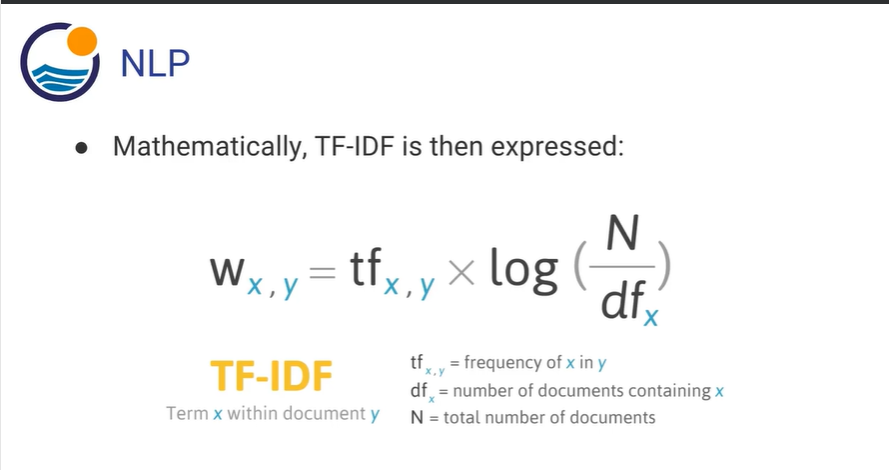

Before we get started with NLP, we need to download an additional library

Go to command prompt and    pip install nltk    or conda install nltk

nltk is our python library 

In [2]:
import nltk

In [2]:
# download and put in l for list
# shows available packages
# we want words package
# d for download
# stopwords

nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> l

Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] bcp47............... BCP-47 Language Tags
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [ ] cess_esp

Hit Enter to continue: q

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sci
import seaborn as sns

%matplotlib inline

In [4]:
# above wasnt working do this instead

from nltk.corpus import stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\D8ISU4A\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
# from notebook, link for UCI (university cal irvine) website that has many ML datasets to use

# read in data
# list comprehension

messages = [line.rstrip() for line in open('SMSSpamCollection')]


In [6]:
# print the length

print(len(messages))

5574


In [7]:
# string for first message
# Collection of text is sometimes called a 'Corpus'

messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [8]:
# print first 10 messages and number them with enumerate

for mess_no,message in enumerate(messages[:10]):
    print(mess_no,message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In [9]:
# \t  notates tab seperated
# use pandas to parse file

messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [10]:
messages = pd.read_csv('SMSSpamCollection', sep='\t', names=['label','message'])

In [11]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
# descibe the dataframe 

messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [13]:
# group by  label to breakout ham and spam labels
# then call describe method

messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [14]:
# feature engineering is important in Natural Language Processing

# here we are adding length to the data frame, calling it messages['length']

messages['length'] = messages['message'].apply(len)

In [15]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


<Axes: ylabel='Frequency'>

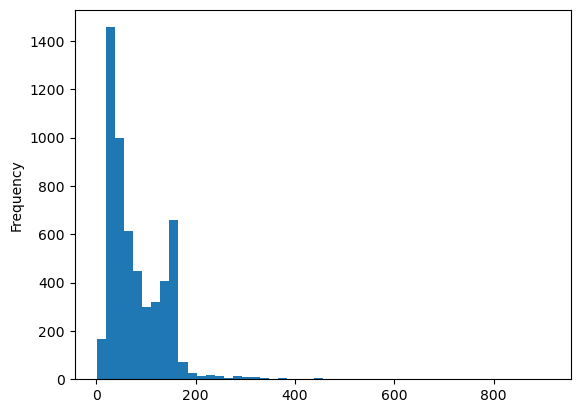

In [16]:
# visualize length of messages

messages['length'].plot.hist(bins=50)

In [17]:
messages['length'].describe()
# some large messages

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [18]:
# shows the long message with 910 words

###  messages[messages['length']==910]

# grab message column off that and iloc[0] on end to print out the string
messages[messages['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

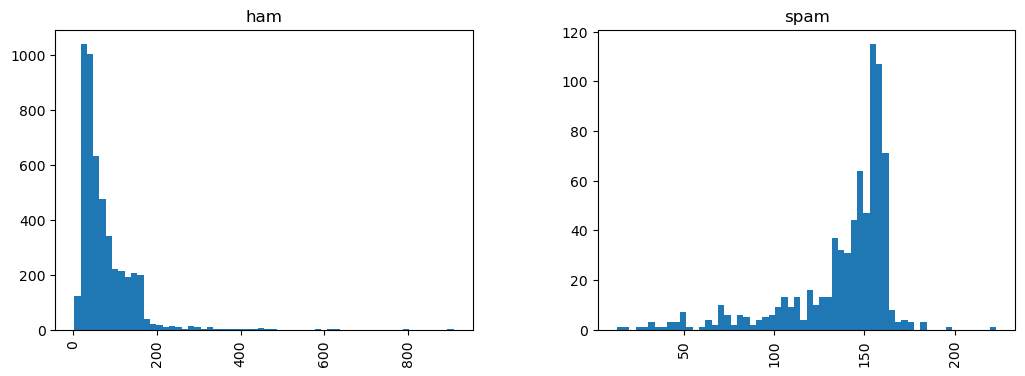

In [19]:
# make a histogram of histogram
# can use seanborn with fasit grid
# we will use pandas built in data visulaization

# spam tends to have more characters

messages.hist(column='length', by='label', bins=60, figsize=(12,4))

In [20]:
# many methods to convert corpus of strings to vector format
# bag of words - each unique word in text is 1 number

# python has a built in string library

import string

In [21]:
# remove punctuation

mess = 'Sample message! Notice: it has punctuation'

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [22]:
# list comprehension to pass in every character to see if it is in string punctuation
# removes puncuation and leaves blank

nopunc = [c for c in mess if c not in string.punctuation]

In [23]:
nopunc

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'm',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 'i',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

In [24]:
# stop words are common words
# from nltk

stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [25]:
# a way of joining elements in a list together

nopunc = ''.join(nopunc)

In [26]:
# now its back together with no punctuation
nopunc

'Sample message Notice it has punctuation'

In [27]:
# another example
x = ['a','b','c','d']

# '' or add '+'
'+'.join(x)

'a+b+c+d'

In [28]:
# a list of all words in nopunc

nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [29]:
# loop through nopunc.split() which is above
# return if lower case word not in stopword list

clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [30]:
# no stop words
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

In [31]:
# lets put it in a function that we can apply to our dataframe

def text_process(mess):
    """
    docstring: 
    1. remove punc
    2. remove stop words
    3. return list of clean text words
    """
    
    nopunc = [char for char in mess if char not in string.punctuation]
    
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [32]:
# check out messages again
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [33]:
# function from above

# grab first 5 messages
###    messages['message'].head(5)


# apply the function above
# creates list of tokens (important words)
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

NLTK library has great tools and documentation for text normalization.
Has many methods

- Stemming, if text has many words like ran run running, stemming breaks it down to run

-Shorthand is also an issue.

Three steps in bag-of-words model:

1. count how many times does a word occur in each message (known as term frequency)
2. weigh the counts, so that frequent tokens get lower weight (Inverse Document Frequency)
3. Normalize the vectors to unit length, to abstract from the original text length (L2 Norm)

We will use Scikit Learns  CountVectorizer. 
This will convert a collection of text documents to a matrix of token counts. A 2d matrix.

Sparse Matrix is what is used when many zeros. Becuase of many documents and words used.

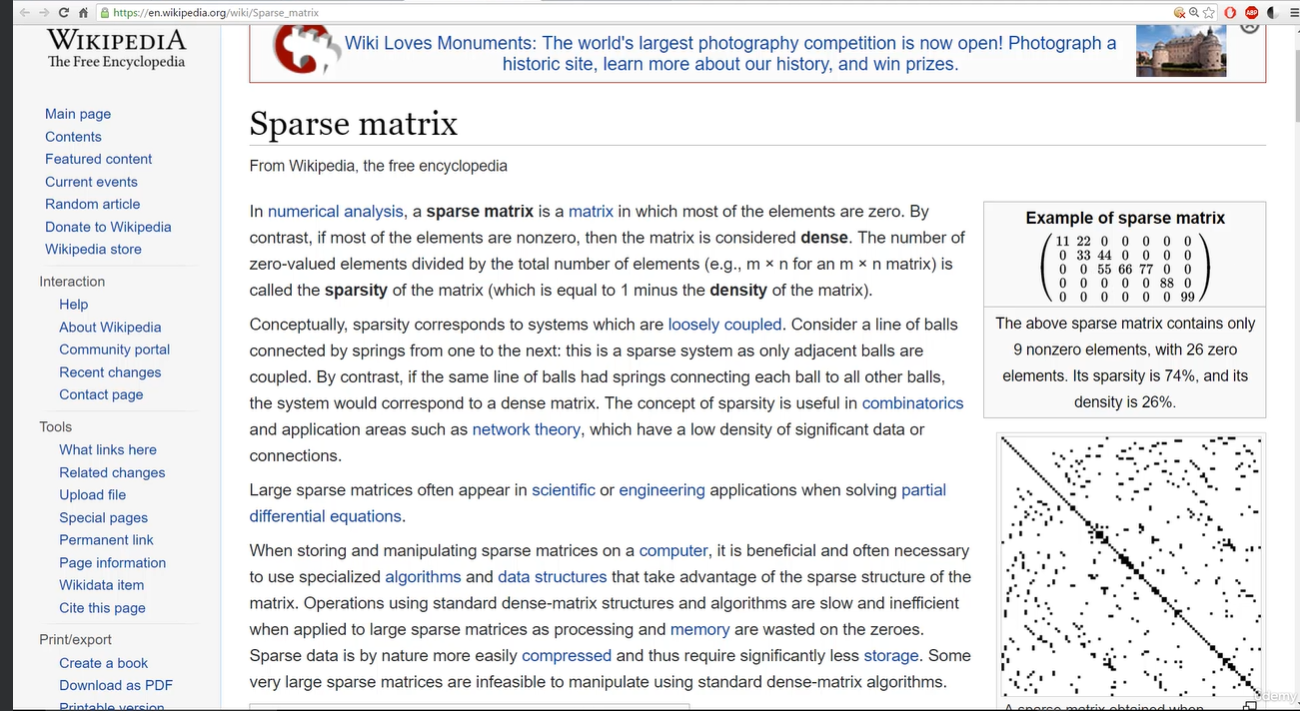

In [34]:
from sklearn.feature_extraction.text import CountVectorizer

In [35]:
# use CountVectorizer
# bag of words transformer
# analyzer will be our text_process function from earlier
# then .fit it to the text data which is messages['message']
# creating a Very large matrix

bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

In [36]:
# prints total number of vocab words

print(len(bow_transformer.vocabulary_))

11425


In [37]:
# make an object from messages dataframe from 4th message

mess4 = messages['message'][3]

In [38]:
# print out message 4

print(mess4)

U dun say so early hor... U c already then say...


In [39]:
# take 1 sample text message to get bag of words count as vector
# grab bow transformer use tranform method, pass in mess4 object

bow4 = bow_transformer.transform([mess4])

In [40]:
# 7 unique words in comment 4, 2 of which come up twice

print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [41]:
# total words
print(bow4.shape)

(1, 11425)


In [42]:
# which ones come up twice, number 4068 in list
# get_feature_names_out() Method

bow_transformer.get_feature_names_out()[4068]

'U'

In [47]:
# check out how bag of word count is large sparce matrix

messages_bow = bow_transformer.transform(messages['message'])

In [48]:
# rows by columns
print('Shape of the Sparse Matrix: ', messages_bow.shape)

Shape of the Sparse Matrix:  (5572, 11425)


In [49]:
# amount of non zero occurences

messages_bow.nnz

50548

In [52]:
# messages divided by bow shape(row times column)

sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))

print('sparsity: {}'.format(sparsity))

sparsity: 0.07940295412668218


In [54]:
# TFIDF  Term 

from sklearn.feature_extraction.text import TfidfTransformer

In [57]:
# instance of tfid transformer

tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [58]:
# pass in 4th message from above

tfidf4 = tfidf_transformer.transform(bow4)

In [59]:
# inverse document frequency
# term frequency
# relationship between these two
# weight value for each of these words

print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [62]:
# check inverse document frequency of the word 'university'
# call tfid_transformer  call idf_  pass in vocabulary  and pass in word we want to check

tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

In [63]:
# convert the entire bag of words corpus into tfid corpus
# create object called messages_tfidf
# instead of 1 word like above, we pass in the whole thing which was messages_bow object from above

messages_tfidf = tfidf_transformer.transform(messages_bow)

We will use a classifciaton algorithm to train spam ham classifier

We can use any classification algorithm

We will use Naive Bayes Algorithm - good choice here

In [64]:
# naive_bayes Algorithm

from sklearn.naive_bayes import MultinomialNB

In [66]:
# create an object
# multinomial NB
# fit to messages_tfidf, we just created it above
# and actual data which is messages['label']

spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

In [67]:
# we will try to classify our single random message
# we will try to predict off of tfid4

# will give array
###  spam_detect_model.predict(tfidf4)

# we want the first item in the output array so [0]
spam_detect_model.predict(tfidf4)[0]

'ham'

In [83]:
# check that from original dataframe messages

messages

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160
5568,ham,Will ü b going to esplanade fr home?,36
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


In [ ]:
# check the actual label column the third

messages['label'][3]

In [69]:
all_pred = spam_detect_model.predict(messages_tfidf)

In [70]:
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

For the above valuation, we used our training data. We shouldn't be using our training data.

We should be splitting our data test set and training set

Otherwise we wouldn't be able to know true predicting power of our model. The training data accuracy would be 100%.

We wouldn't be able to classify any new messages. 

So we need to use test train split

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
# train test split
msg_train, msg_test, label_train, label_test = train_test_split(messages['message'], messages['label'],test_size=0.3 )

In [73]:
# split up the data

msg_train

671                  Ho ho - big belly laugh! See ya tomo
4217                        Er mw im filled tuth is aight
3745    Nobody names their penis a girls name this sto...
1854    I just made some payments so dont have that mu...
2788    Forgot it takes me 3 years to shower, sorry. W...
                              ...                        
2074    FreeMsg: Claim ur 250 SMS messages-Text OK to ...
1931                  Carry on not disturbing both of you
873                       I'll text you when I drop x off
2675            I am 6 ft. We will be a good combination!
2187    So is there anything specific I should be doin...
Name: message, Length: 3900, dtype: object

In [74]:
# scikit learn has a data pipeline feature
# do this with real world text data

from sklearn.pipeline import Pipeline

# if we want to do random forest classifier instead of .. then we import 

###   from sklearn.ensemble import RandomForestClassifier

In [84]:
# make object called pipeline
# its an instance of pipeline
# pass in list of what we want to do
# strings are labels to reference later

pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),   # string to token step
    ('tfidf', TfidfTransformer()),                    # integer counts to weighted tfid scores
    ('classifier', MultinomialNB())                   # train this to model
    # if we use randomforestclassifier instead of naive bayes
    ### ('classifier', RandomForestClassifier())
    # then run the below again
])

In [76]:
# now we can directly pass message text data in
# and the pipeline will do all the preprocessing work
# does 3 steps above
# training data


pipeline.fit(msg_train, label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x0000021A09241750>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [80]:
# predict Method
# pass in test data

predictions = pipeline.predict(msg_test)

In [81]:
# import classification report

from sklearn.metrics import classification_report

In [82]:
# print classification report
# label test data and predictions

print(classification_report(label_test,predictions))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1450
        spam       1.00      0.74      0.85       222

    accuracy                           0.97      1672
   macro avg       0.98      0.87      0.92      1672
weighted avg       0.97      0.97      0.96      1672

